図14.16のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#制御対象のパラメータを与える
K = 1 #K=1
omegan = 0.1 #ω_n=0.1
zeta = 0.2 #ζ=0.2

#制御対象の分子・分母多項式と伝達関数表現を与える
num = [0, 0, K * omegan**2] #分子多項式
den = [1, 2 * zeta * omegan, omegan**2 ] #分母多項式

#コントローラC_0の分子・分母多項式を与える
numc0 = [ 1 ] #C_{0}の分子多項式
denc0 = [ 1 ] #C_{0}の分母多項式

#コントローラC_{1}=K_pの分子・分母多項式を与える．
numc1 = [ 100 ] #C_{1}の分子多項式
denc1 = [ 1 ] #C_{1}の分母多項式

#位相遅れコントローラの分子・分母多項式を与える．
omega1 = 0.1 #位相遅れコントローラのパラメータ
numPLG = [ 1, omega1 ] #位相遅れコントローラの分子多項式
denPLG = [ 1, 0 ] #位相遅れコントローラの分母多項式

#位相進みコントローラのパラメータと分子・分母多項式を与える．
omega3 = 8 #位相進みコントローラのパラメータ
omega4 = 0.5 #位相進みコントローラのパラメータ
numPLE = [ omega3, omega3 * omega4 ] #位相進みコントローラの分子多項式
denPLE = [ omega4, omega4 * omega3 ] #位相進みコントローラの分母多項式

#Roll offコントローラのパラメータと分子・分母多項式を与える
omega5 = 10 #ω_5=10
zeta5 = 0.5 #ζ_5=0.5
num5 = [omega5**2] #Roll offコントローラの分子多項式
den5 = [1, 2 * zeta5 * omega5, omega5**2] #Roll offコントローラの分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys = matlab.tf( num, den ) #制御対象の伝達関数表現
c0 = matlab.tf( numc0, denc0 ) #C_{0}の伝達関数表現
c1 = matlab.tf( numc1, denc1 ) #C_{1}の伝達関数表現
cPLG = matlab.tf( numPLG, denPLG ) #位相遅れコントローラの伝達関数表現
cPLE = matlab.tf( numPLE, denPLE ) #位相進みコントローラの伝達関数表現
cont_roll = matlab.tf(num5, den5) #Roll offコントローラの伝達関数表現

#開ループ伝達関数を求める
sysL3 = c1*cPLG*cPLE*sys #L_3(s) = P(s)C_3(s)の場合の開ループ伝達関数
sysL4 = c1*cPLG*cPLE*cont_roll*sys #L_4(s) = P(s)C_4(s)の場合の開ループ伝達関数

In [3]:
#開ループ伝達関数L_4(s)の分子多項式と伝達関数表現を与える
[numL44, denL44] = matlab.tfdata(sysL4) #開ループ伝達関数の分子・分母多項式を抜き出す
numL4 = numL44[0][0] #分子多項式におけるPythonの配列の処理
denL4 = denL44[0][0] #分母多項式におけるPythonの配列の処理

#各コントローラに対応した開ループ伝達関数を与える
sysLG4 = signal.lti(numL4, denL4) #L_3の場合の伝達関数表現（signal.ltiの場合）

In [4]:
#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#ステップ信号を作成
us = np.ones(len(t)) #ステップ信号

#観測ノイズを作成
ns = 0.3*np.sin(25 * t) #観測ノイズ

#閉ループ伝達関数の計算
sysc3 = matlab.feedback(sysL3, 1, -1) #L_3(s)の場合の閉ループ伝達関数
sysc4 = matlab.feedback(sysL4, 1, -1) #L_4(s)の場合の閉ループ伝達関数

#ステップ応答の計算
y3n, t3n, x3 = matlab.lsim(sysc3, us + ns, t) #L_{3}の場合のステップ応答（lsimによる計算）
y4n, t4n, x4 = matlab.lsim(sysc4, us + ns, t) #L_{3}の場合のステップ応答（lsimによる計算）

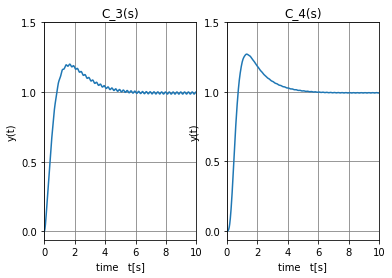

In [5]:
#図14.16

#図14.16(a)のプロット
plt.subplot(1, 2, 1) #複数の図を並べるためのコマンド．1行2列の1列目という意味
plt.plot(t3n, y3n) #ステップ応答をプロット
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("C_3(s)") #タイトルの表示

#図14.16(b)のプロット
plt.subplot(1, 2, 2) #複数の図を並べるためのコマンド．1行2列の2列目という意味
plt.plot(t4n, y4n) #ステップ応答をプロット
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("C_4(s)") #タイトルの表示
plt.show() #グラフの表示
plt.show() #グラフの表示

図14.17のプロット

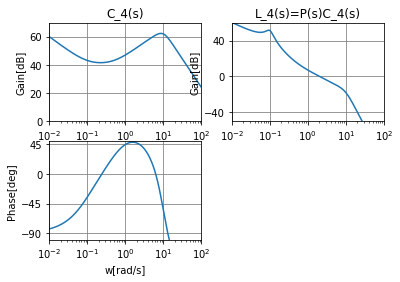

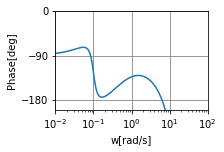

In [6]:
# 図14_17(a)

#コントローラC_4(s)の伝達関数伝達関数表現を求める
C4 = c1*cPLG*cPLE*cont_roll #C_4(s)の伝達関数表現

#コントローラC_4(s)の分子多項式と伝達関数表現を与える
[numC44, denC44] = matlab.tfdata(C4) #コントローラC_4(s)の分子・分母多項式を抜き出す
numC4 = numC44[0][0] #分子多項式におけるPythonの配列の処理
denC4 = denC44[0][0] #分母多項式におけるPythonの配列の処理

#各コントローラに対応した開ループ伝達関数を与える
sysC4 = signal.lti(numC4, denC4) #コントローラC_4(s)の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

# ゲインと位相の計算
wC4, gainC4, phaseC4 = signal.bode(sysC4, w) #ゲインと位相
wL4, gainL4, phaseL4 = signal.bode(sysLG4, w) #ゲインと位相

# 図14_17(a)のプロット
plt.subplot(2, 2, 1) #複数の図を並べるためのコマンド．2行1列の1行1列目という意味
plt.semilogx(wC4, gainC4) #ゲイン線図を描く
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([0,70]) #縦軸の範囲の指定
plt.yticks([0,20,40,60]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("C_4(s)")

plt.subplot(2, 2, 3) #複数の図を並べるためのコマンド．2行1列の2行1列目という意味
plt.semilogx(wC4, phaseC4) #位相線図を描く
plt.xlim([0.01,100])#横軸（角周波数）の範囲の指定
plt.ylim([-100,50]) #縦軸の範囲の指定
plt.yticks([-90,-45,0,45]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示
#plt.title("C_4(s)")

# 図14_17(b)のプロット
plt.subplot(2, 2, 2) #複数の図を並べるためのコマンド．2行1列の1行2列目という意味
plt.semilogx(wL4, gainL4) #ゲイン線図を描く
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-50,60]) #縦軸の範囲の指定
plt.yticks([-40,0,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_4(s)=P(s)C_4(s)")
plt.show() #グラフの表示

plt.subplot(2, 2, 4) #複数の図を並べるためのコマンド．2行1列の2行2列目という意味
plt.semilogx(wL4, phaseL4) #位相線図を描く
plt.xlim([0.01,100])#横軸（角周波数）の範囲の指定
plt.ylim([-200,0]) #縦軸の範囲の指定
plt.yticks([-180,-90,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

plt.show() #グラフの表示